<a href="https://colab.research.google.com/github/FranItu/CODOJOTRACK1/blob/main/Interes2_Francisco_Iturralde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTERES

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Coding_Dojo/Bases_De_Datos/mortgages.csv')
#se hizo una manipulacion manual del documento, por tener filas vacias
df.head(160)

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03
...,...,...,...,...,...,...,...,...
155,156,270243.51,1686.42,675.60,1010.82,269232.69,30 Year,0.03
156,157,269232.69,1686.42,673.08,1013.34,268219.35,30 Year,0.03
157,158,268219.35,1686.42,670.54,1015.88,267203.47,30 Year,0.03
158,159,267203.47,1686.42,668.00,1018.42,266185.05,30 Year,0.03


In [5]:
pd.unique(df['Mortgage Name'])
pd.unique(df['Interest Rate'])

array([0.03, 0.05])

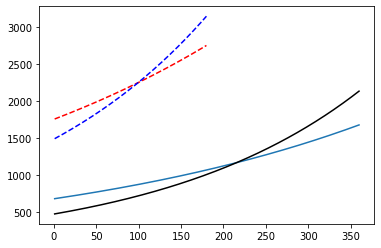

In [6]:
Mort30 = df['Mortgage Name'] == '30 Year'
Mort15 = df['Mortgage Name'] == '15 Year'
Inte3 = df['Interest Rate'] == 0.03
Inte5 = df['Interest Rate'] == 0.05
plt.plot(df[Mort30 & Inte3]['Month'], df[Mort30 & Inte3]['Principal Paid'])
plt.plot(df[Mort30 & Inte5]['Month'], df[Mort30 & Inte5]['Principal Paid'],
         color = 'black')
plt.plot(df[Mort15 & Inte3]['Month'], df[Mort15 & Inte3]['Principal Paid'],
         color = 'red',
         linestyle = '--')
plt.plot(df[Mort15 & Inte5]['Month'], df[Mort15 & Inte5]['Principal Paid'],
         color = 'blue',
         linestyle = '--')
plt.show()

In [17]:
df303 = df[Mort30 & Inte3] #Dataframe 30 anhos 0.03 interes
df305 = df[Mort30 & Inte5] #Dataframe 30 anhos 0.05 interes
df153 = df[Mort15 & Inte3] #Dataframe 15 anhos 0.03 interes
df155 = df[Mort15 & Inte5] #Dataframe 15 anhos 0.05 interes

In [ ]:
#Cuadros cumulativos
Cumdf303 = df303[['Mortgage Name', 'Interest Rate', 'Month','Interest Paid']]
Cumdf303['Cumulative Pay'] = Cumdf303['Interest Paid'].cumsum(axis = 0)
Cumdf305 = df305[['Mortgage Name', 'Interest Rate', 'Month','Interest Paid']]
Cumdf305['Cumulative Pay'] = Cumdf305['Interest Paid'].cumsum(axis = 0) 
Cumdf153 = df153[['Mortgage Name', 'Interest Rate', 'Month','Interest Paid']]
Cumdf153['Cumulative Pay'] = Cumdf153['Interest Paid'].cumsum(axis = 0) 
Cumdf155 = df155[['Mortgage Name', 'Interest Rate', 'Month','Interest Paid']]
Cumdf155['Cumulative Pay'] = Cumdf155['Interest Paid'].cumsum(axis = 0) 

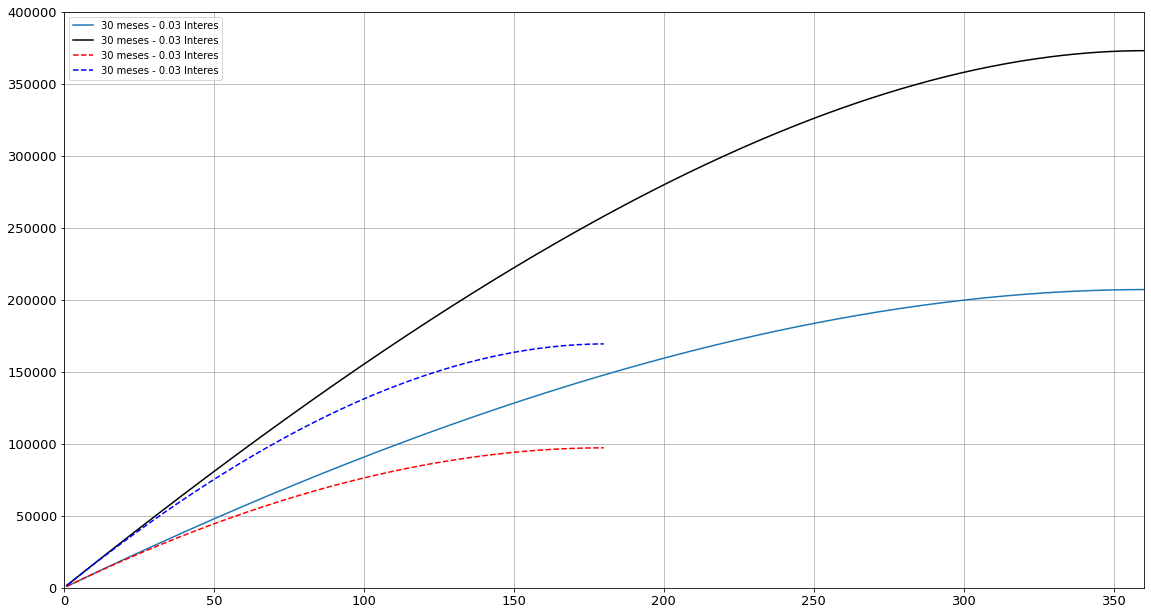

In [56]:
axes = plt.figure().add_axes([0.5,0.5,2.5,2]) #genera los ejes y la resolucion de estos
axes.set_xlim([0,360])
axes.set_ylim([0,400000])
plt.plot(Cumdf303['Month'], Cumdf303['Cumulative Pay'],
         label = '30 meses - 0.03 Interes')
plt.plot(Cumdf305['Month'], Cumdf305['Cumulative Pay'],
         color = 'black',
         label = '30 meses - 0.03 Interes')
plt.plot(Cumdf153['Month'], Cumdf153['Cumulative Pay'],
         color = 'red',
         linestyle = '--',
         label = '30 meses - 0.03 Interes')
plt.plot(Cumdf155['Month'], Cumdf155['Cumulative Pay'],
         color = 'blue',
         linestyle = '--',
         label = '30 meses - 0.03 Interes')
plt.grid()
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend()
plt.show()